In [1]:
cd((@__DIR__) * raw"\..")
include("../table_reader.jl")
include("../utils/Missing_values.jl")

ImputeMissingValues!

In [2]:
series=extract_series("TX_STAID000737.txt",plot=false)
series=truncate_MV(series,"TX")
years=unique(Dates.year.(series.DATE))

include("../utils/Simulation.jl")
Days_list=GatherYearScenario(series[!,2],series.DATE)
avg_day=mean.(Days_list)
max_day=maximum.(Days_list)
df_month = @chain series begin
    @transform(:TEMP = series[!,2]) #Give a common name for TX, TN, etc...
    @transform(:MONTH = month.(:DATE)) #add month column
    @by(:MONTH, :MONTHLY_MEAN = mean(:TEMP), :MONTHLY_STD = std(:TEMP), :MONTHLY_MAX = maximum(:TEMP)) # grouby MONTH + takes the mean/std in each category 
end

12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       5.72561      4.27158         15.2
   2 │     2       6.92369      4.30074         19.0
   3 │     3      10.4113       4.13513         24.8
   4 │     4      13.9756       4.33257         27.9
   5 │     5      17.7996       4.37329         31.7
   6 │     6      20.7504       4.25252         34.8
   7 │     7      22.8692       4.1839          41.5
   8 │     8      22.9127       3.89454         37.1
   9 │     9      19.88         3.64365         35.1
  10 │    10      15.2175       3.63457         27.8
  11 │    11       9.61658      3.66245         20.3
  12 │    12       6.56141      4.09127         16.1

# AR(1)

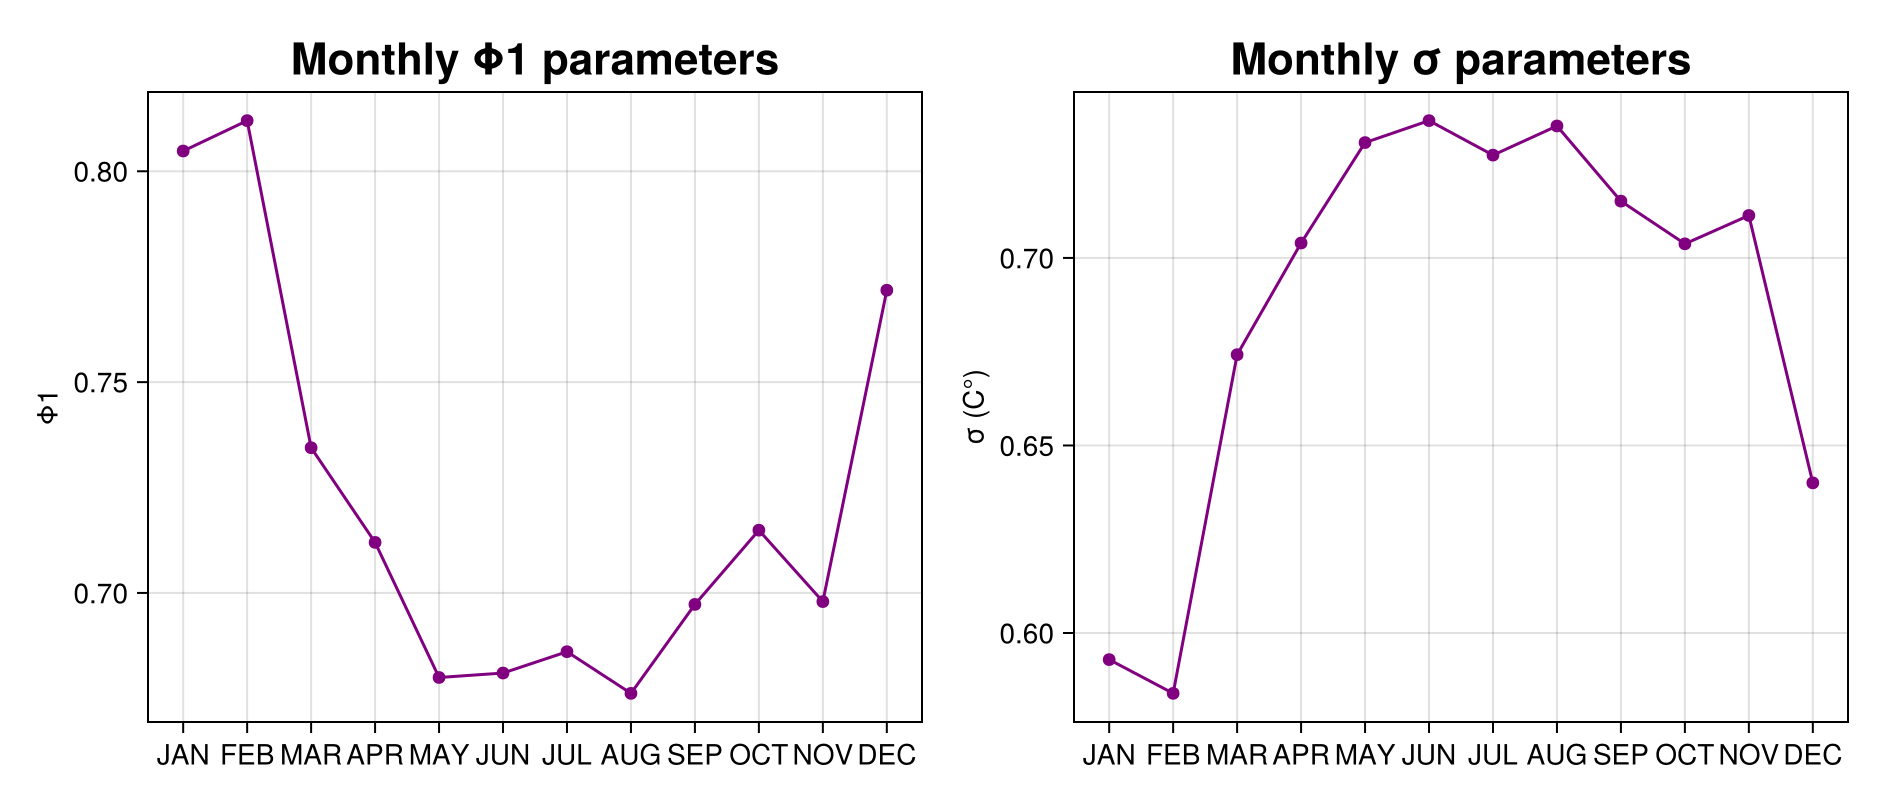

In [10]:
include(raw"..\utils\Structure.jl")
Model = fit_AR(series[:,2],series.DATE,p=1)
PlotMonthlyparams([invert(Model.Φ) ; [Model.σ]])

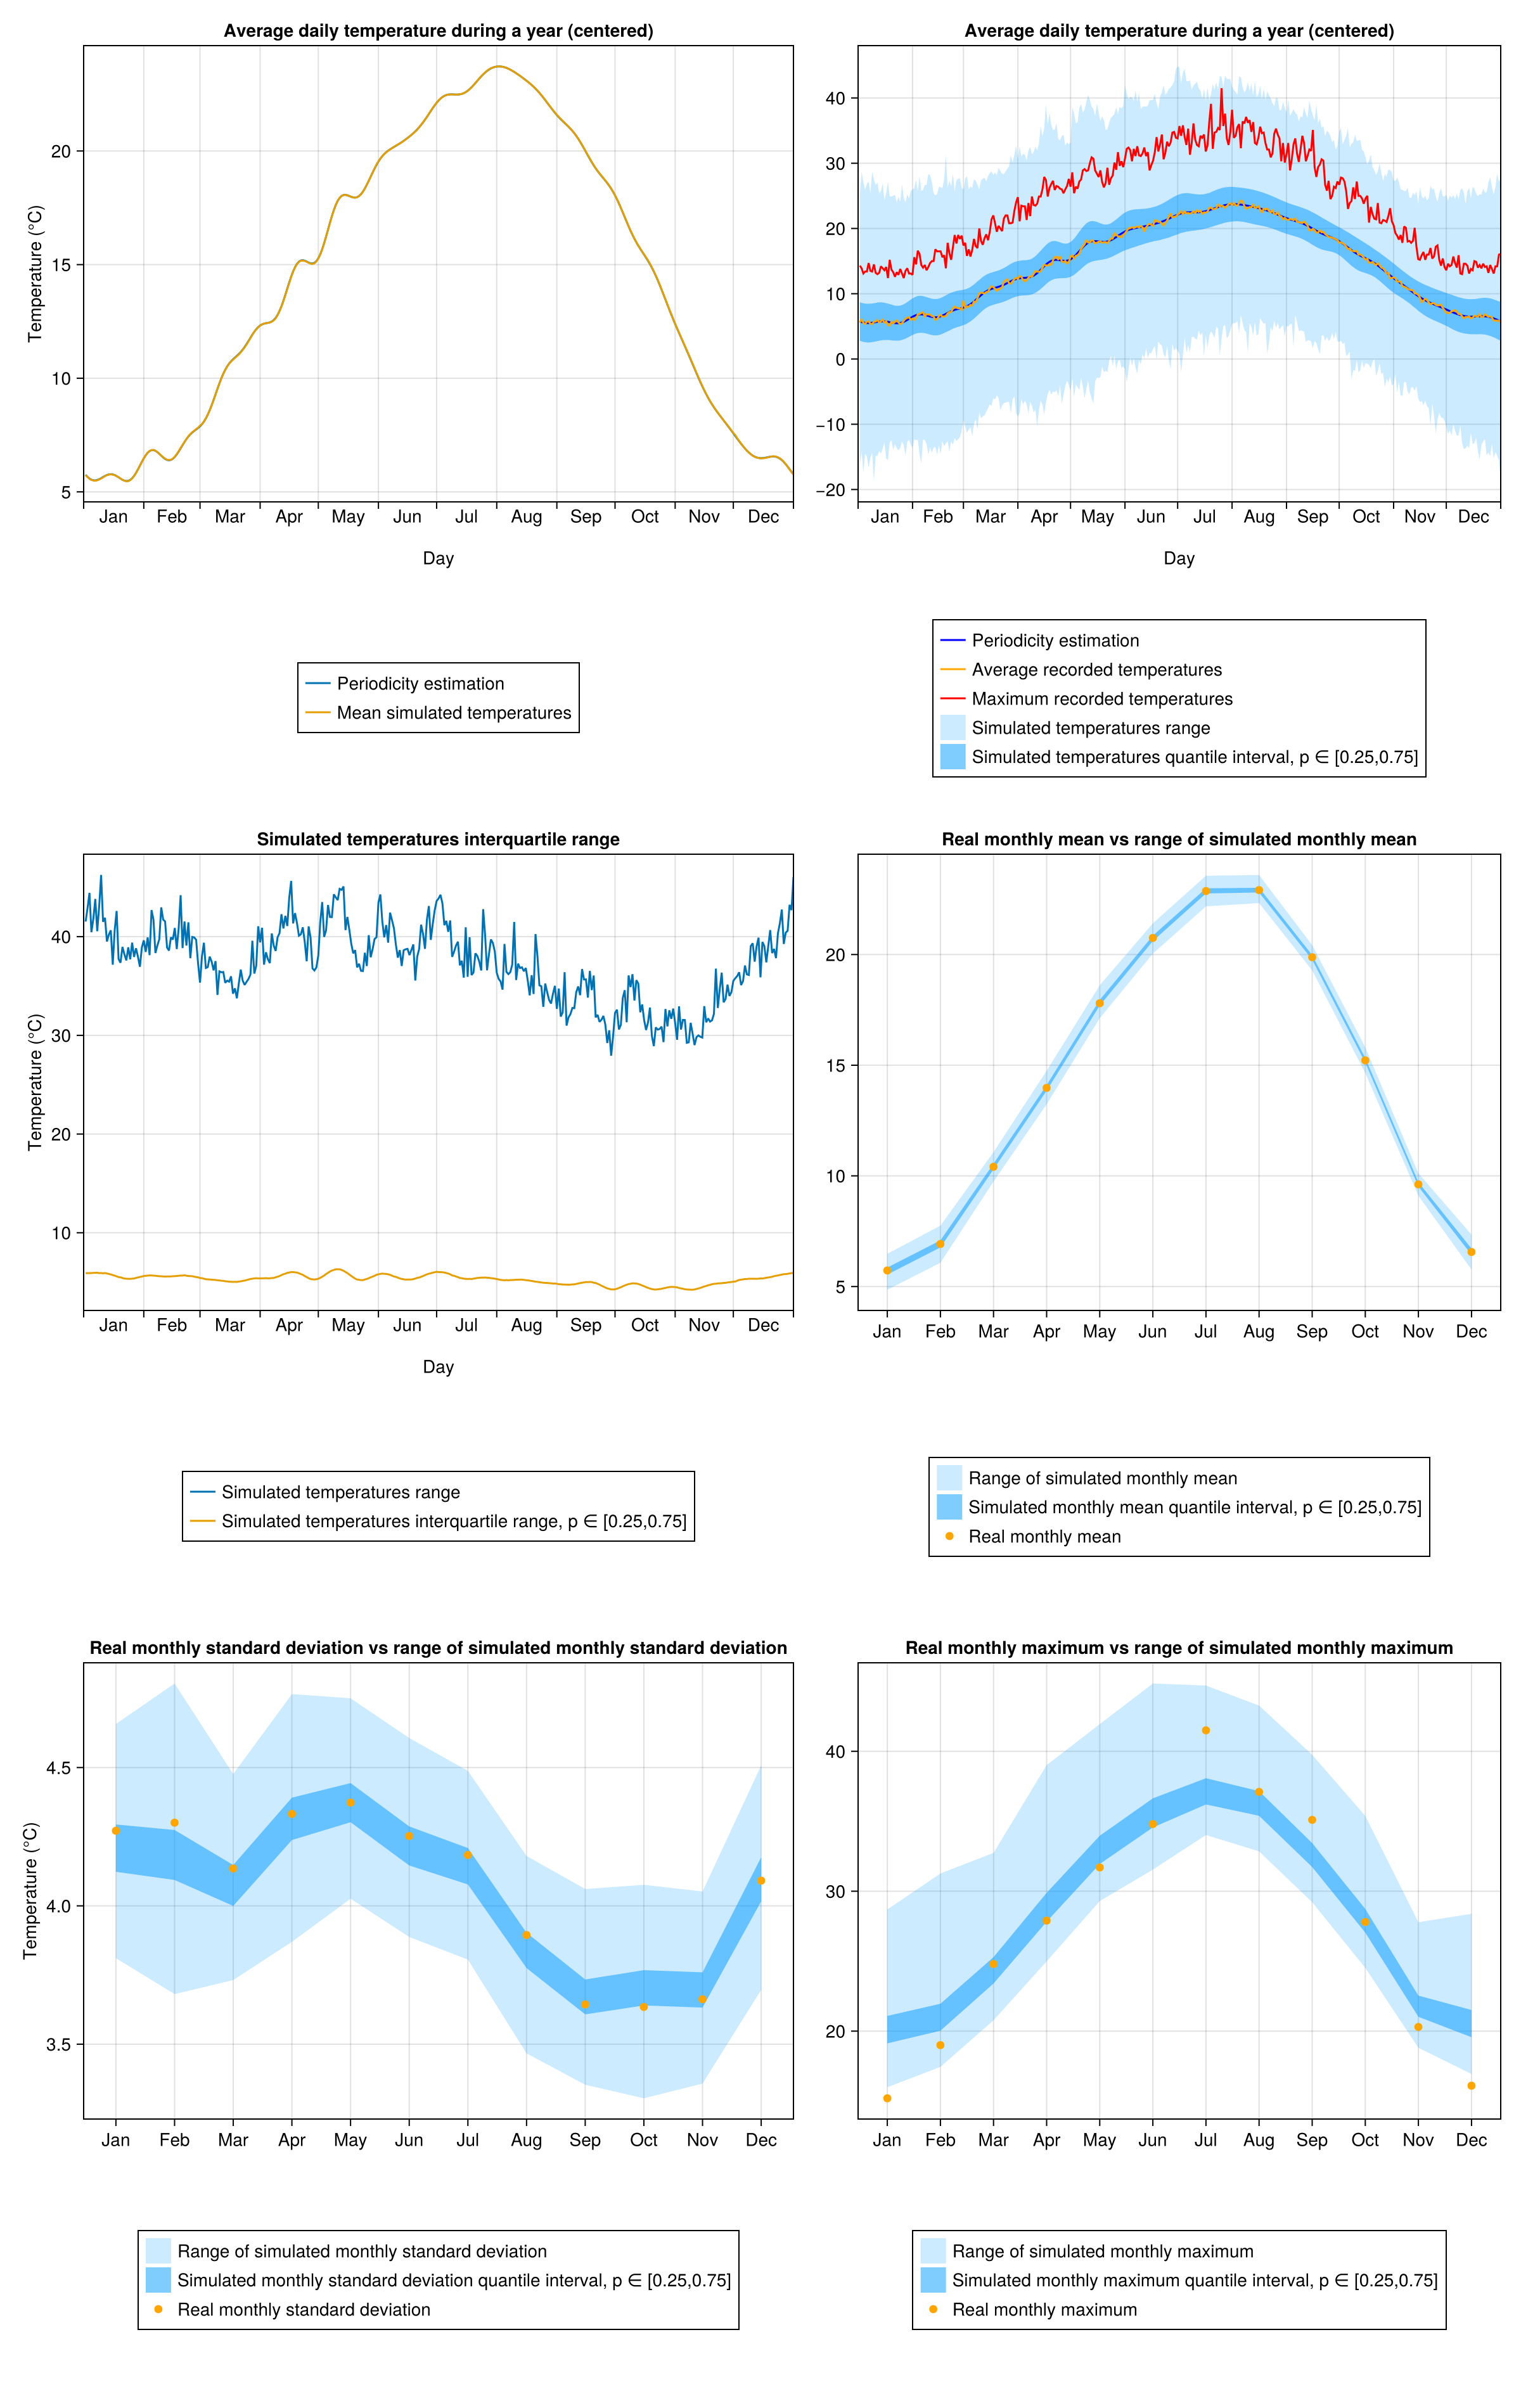

In [11]:
sample_ = rand(Model, 5000, series.DATE)
Sample_diagnostic(sample_, series.DATE, Model.period .+ mean(Model.trend), avg_day, max_day, df_month, format_ = "vertical")

In [5]:
idx_jan = month.(series.DATE) .== 1
max_jan = [maximum(ts[idx_jan]) for ts in sample_]

100-element Vector{Float64}:
 19.367541920579676
 21.27723246056618
 24.59634181753399
 23.230910855468395
 20.406729450075197
 17.244514506111948
 20.01173283246866
 20.75687640711067
 19.45165482494602
 19.04438470263534
  ⋮
 22.202564449943722
 20.158731653700954
 19.1021886416092
 18.794917861225876
 22.020382795885194
 23.78826239524598
 20.160767114747465
 21.53559789430028
 19.455171255938918

In [6]:
minimum(max_jan)

16.944899224484985

In [7]:
maximum(series[idx_jan,2])

15.2

# AR(2)

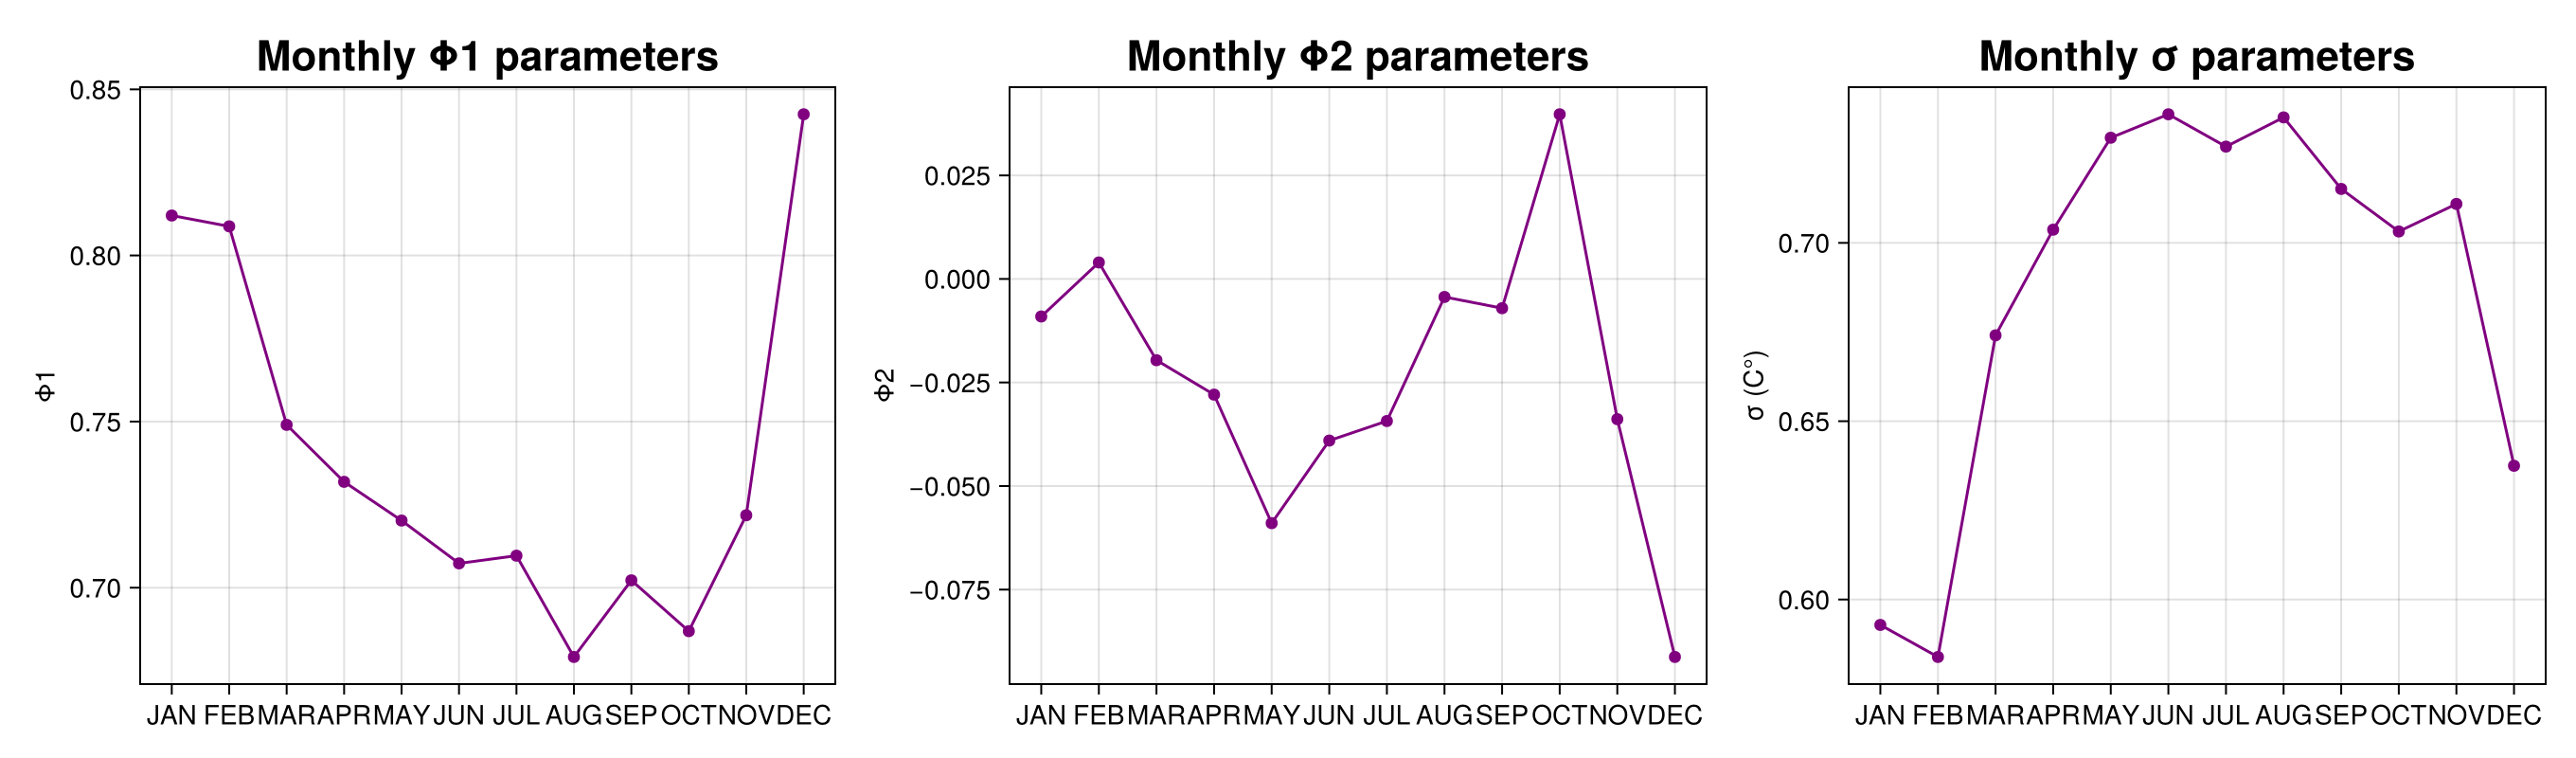

In [8]:
include(raw"..\utils\Structure.jl")
Model2 = fit_AR(series[:,2],series.DATE,p=2)
PlotMonthlyparams([invert(Model2.Φ) ; [Model2.σ]])

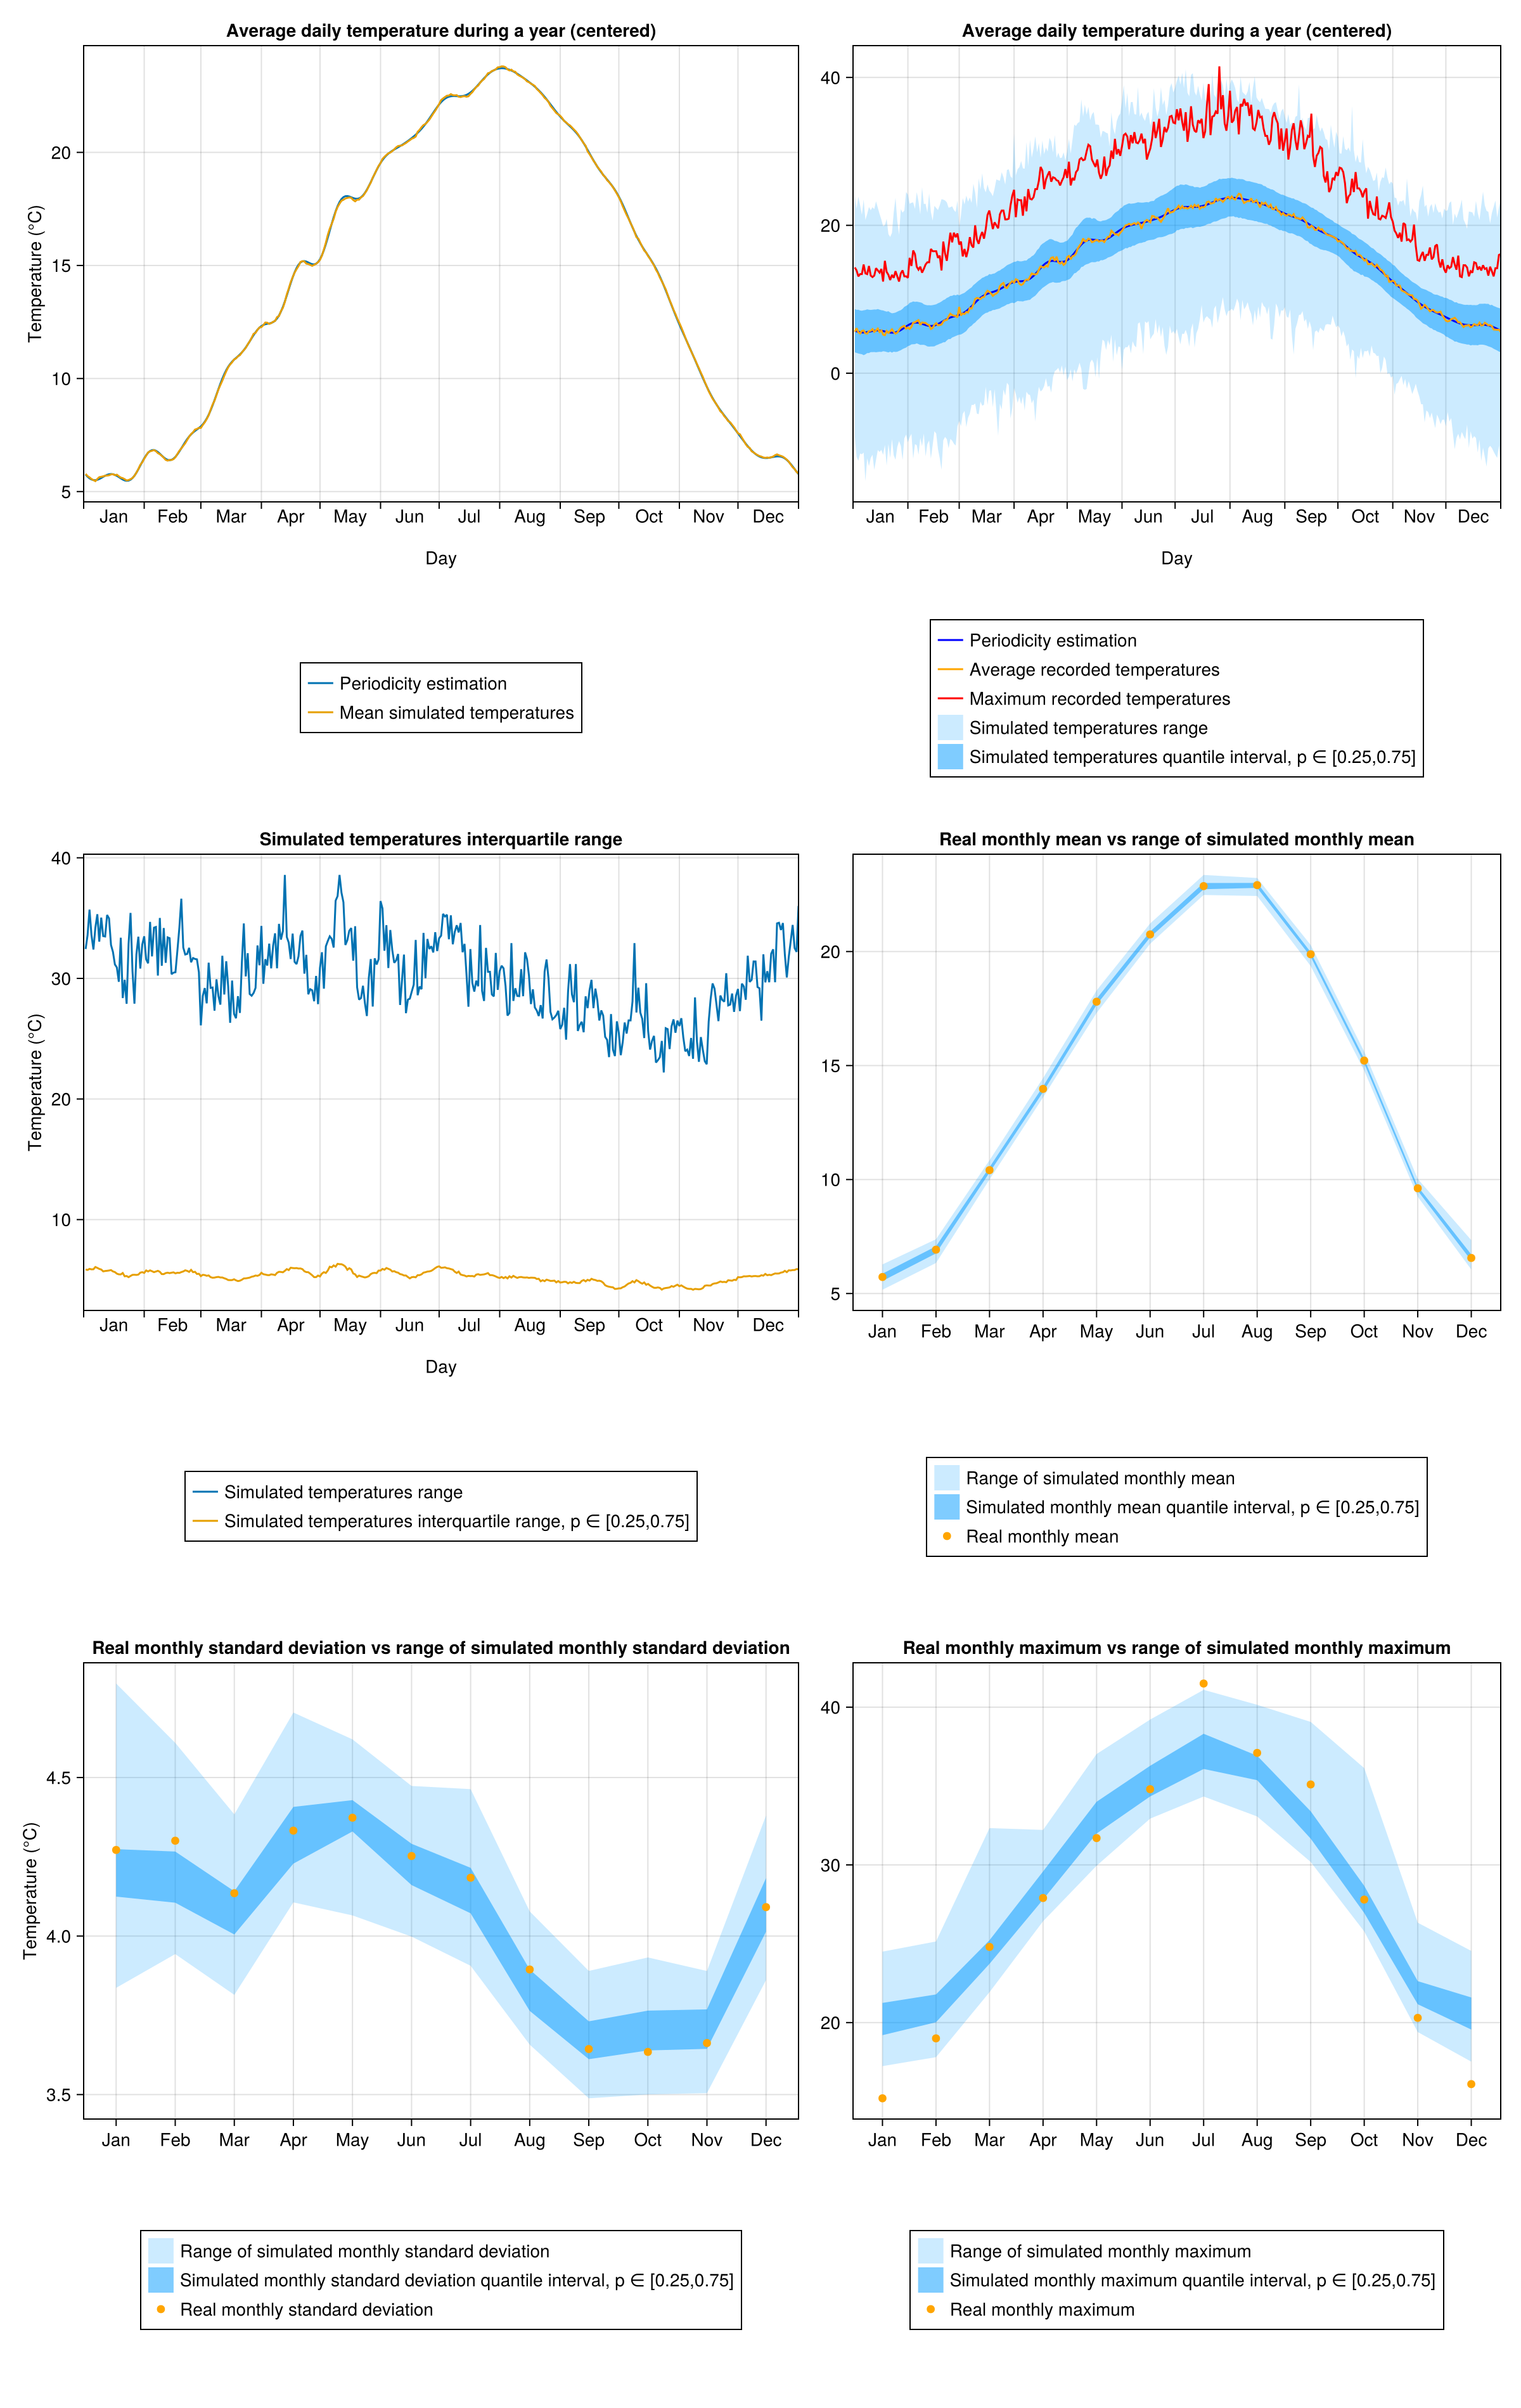

In [9]:
sample_ = rand(Model2, 100, series.DATE[1]:series.DATE[end])
Sample_diagnostic(sample_, series.DATE, Model2.period .+ mean(Model2.trend), avg_day, max_day, df_month, format_ = "vertical")